(Sistema 1) Uma barra de massa $M$ e cuja posição do centro é $x$ pode se mover sobre um apoio sujeita a um atrito. Em uma ceta posição $x_1$ há um pêndulo de comprimento $l$ e massa $m$ deslocado de um ângulo $\theta_1$. Mais a frente em uma posição $x_2$ há outro pêndulo de comprimento $l$ e massa $m$ deslocado de um ângulo $\theta_2$. Considere $d$ como a distância entre as posições de cada pêndulo ao centro da barra.

Equação da barra: $\frac{d^2x}{dt^2}(M + 2m) - \mu \frac{dx}{dt} - ml(\frac{d^2 \theta_1}{dt^2} \cos(\theta_1) - \frac{d \theta_1}{dt}^2 \sin(\theta_1) + \frac{d^2 \theta_2}{dt^2} \cos(\theta_2) - \frac{d \theta_2}{dt}^2 \sin(\theta_2)) = 0$

Equação do pêndulo 1: $\frac{d^2x}{dt^2} \cos(\theta_1) - g \sin(\theta_1) - l\frac{d^2 \theta_1}{dt^2} = 0$

Equação do pêndulo 2: $\frac{d^2x}{dt^2} \cos(\theta_2) - g \sin(\theta_2) - l\frac{d^2 \theta_2}{dt^2} = 0$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

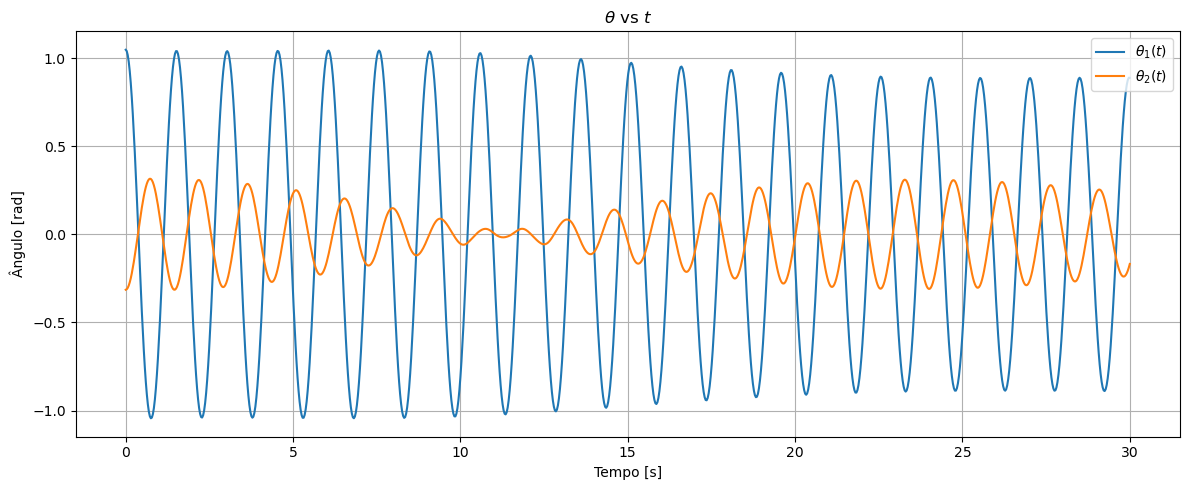

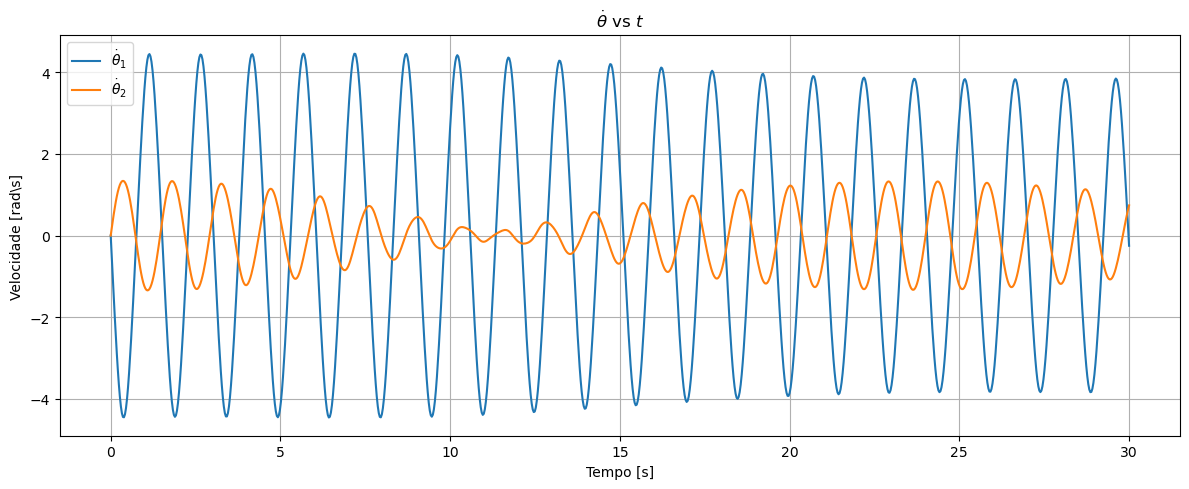

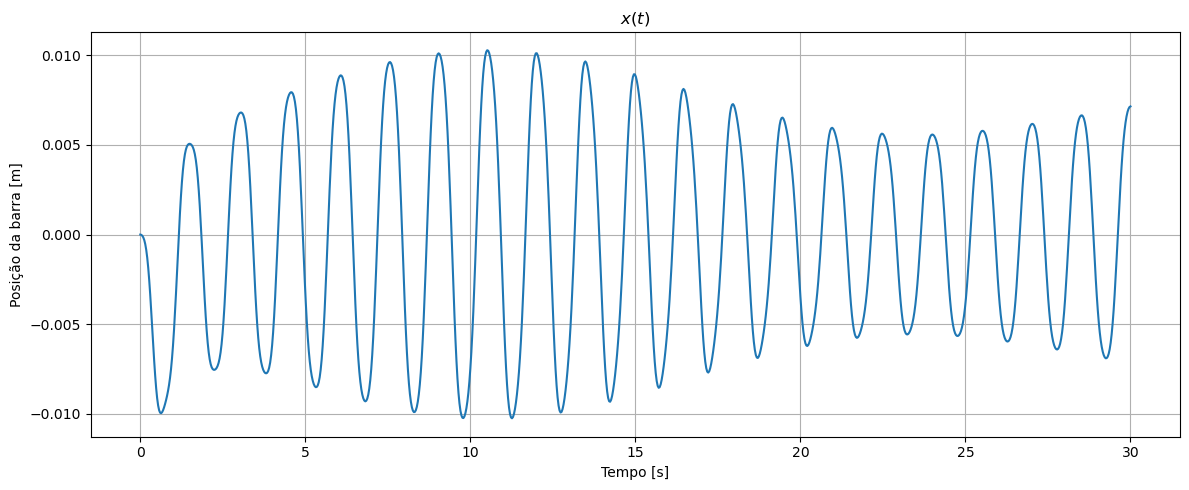

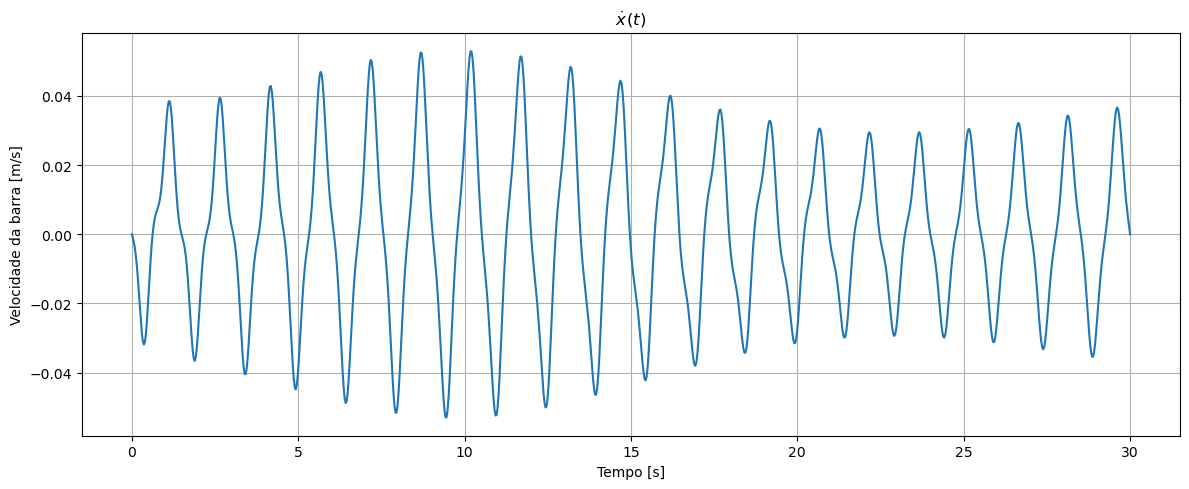

In [33]:
#parametros

M = 4
m = 0.1
l = 0.5
d = 0.5
mu = 4
g = 9.8

def sistema1(y, t):                             
    x, v, theta1, omega1, theta2, omega2 = y

    dx = v
    dtheta1 = omega1
    dtheta2 = omega2

    #equação da barra
    dv = (
        -mu*v - m*g*np.sin(theta1)*np.cos(theta1) -       #atrito negativo
        m*l*omega1**2*np.sin(theta1) - 
        m*g*np.sin(theta2)*np.cos(theta2) -
        m*l*omega2**2*np.sin(theta2)
    ) / (M + 2 * m - m*np.cos(theta1)**2 - m*np.cos(theta2)**2)

    #equação dos pendulos
    domega1 = (dv*np.cos(theta1) - g*np.sin(theta1))/l
    domega2 = (dv*np.cos(theta2) - g*np.sin(theta2))/l

    return [dx, dv, dtheta1, domega1, dtheta2, domega2]

#condições iniciais
x0 = 0
v0 = 0
theta1_0 = np.pi/3  
omega1_0 = 0
theta2_0 = -np.pi/10
omega2_0 = 0

y0 = [x0, v0, theta1_0, omega1_0, theta2_0, omega2_0]

t = np.linspace(0, 30, 1000)

#solução
sol = odeint(sistema1, y0, t)     # ---> odeint só resolve EDO de primeiro grau


#grafico angulos X tempo

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 2] , label=r'$\theta_1(t)$')
plt.plot(t, sol[:, 4], label=r'$\theta_2(t)$')
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title(r'$\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()


#grafico velocidades angulares X tempo

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 3], label=r'$\dot \theta_1$')
plt.plot(t, sol[:, 5], label=r'$\dot \theta_2$')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [rad\s]')
plt.title(r'$\dot\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()

#grafico posição da barra X tempo

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 0])
plt.xlabel('Tempo [s]')
plt.ylabel('Posição da barra [m]')
plt.title(r'$x(t)$')
plt.grid(True)
plt.tight_layout()

#grafico velocidade da barra

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade da barra [m/s]')
plt.title(r'$\dot x(t)$')
plt.grid(True)
plt.tight_layout()

plt.show()


(Sistema 2) Dois pêndulos de massa $m$ e comrimento $l$ estão fixo em uma barra fixa nas posições $x_1$ e $x_2$ e distantes um do outro por um comprimento $d$. Suas massas estão conectadas por uma mola de constante $k$ tamanho $L$ quando deformada. Ao se movimentarem, ficam sujeitos a um certo atrito, de coeficiente $\gamma$, por "rasparem" na parede.

Equação do pêndulo 1: $ml^2 \ddot \theta_1 - \gamma l \dot \theta_1 + m l g \sin(\theta1) - k l^2 \cos(\theta1) (\sin(\theta_2) - 
                       \sin(\theta1)) = 0$

Equação do pêndulo 2: $ml^2 \ddot \theta_2 - \gamma l \dot \theta_2 + m l g \sin(\theta2) + k l^2 \cos(\theta2) (\sin(\theta_2) - 
                       \sin(\theta1)) = 0$

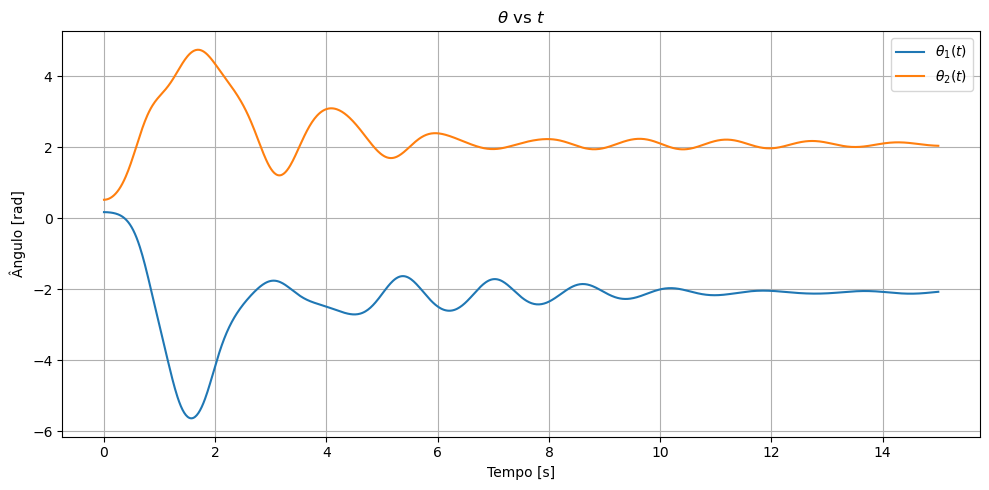

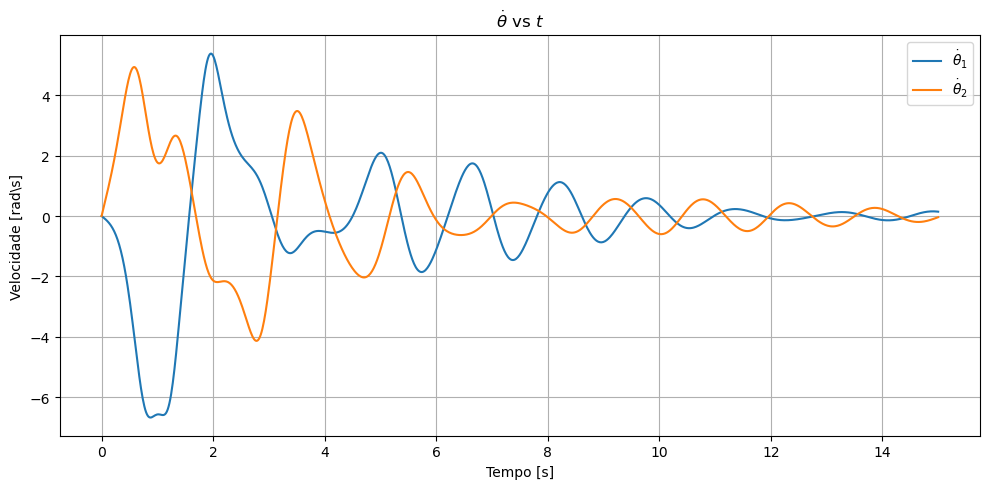

In [22]:
#parametros

m = 0.2
l = 1
d = 0.5
gamma = 0.1
k = 2
g = 9.8

def sistema2(y, t):
    theta1, omega1, theta2, omega2 = y

    dtheta1 = omega1
    dtheta2 = omega2

    #equação dos pendulos
    domega1 = (
             -gamma*l*omega1 +                          #se colocar -gamma o grafico parece certo, mas matematicamente errado
             m*l*g*np.sin(theta1) -
             k*l**2*np.cos(theta1)*(np.sin(theta2) - np.sin(theta1))
    )/(m*l**2)
    
    domega2 = (
             -gamma*l*omega2 +
             m*l*g*np.sin(theta2) +
             k*l**2*np.cos(theta2)*(np.sin(theta2) - np.sin(theta1))
    )/(m*l**2)

    return [dtheta1, domega1, dtheta2, domega2]

#condições iniciais
theta1_0 = np.pi/18
omega1_0 = 0
theta2_0 = np.pi/6
omega2_0 = 0

y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

t = np.linspace(0, 15, 1000)

#solução
sol = odeint(sistema2, y0, t)


#grafico angulos X tempo

plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 0], label=r'$\theta_1(t)$')
plt.plot(t, sol[:, 2], label=r'$\theta_2(t)$')
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title(r'$\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()


#grafico velocidades angulares X tempo

plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 1], label=r'$\dot \theta_1$')
plt.plot(t, sol[:, 3], label=r'$\dot \theta_2$')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [rad\s]')
plt.title(r'$\dot\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


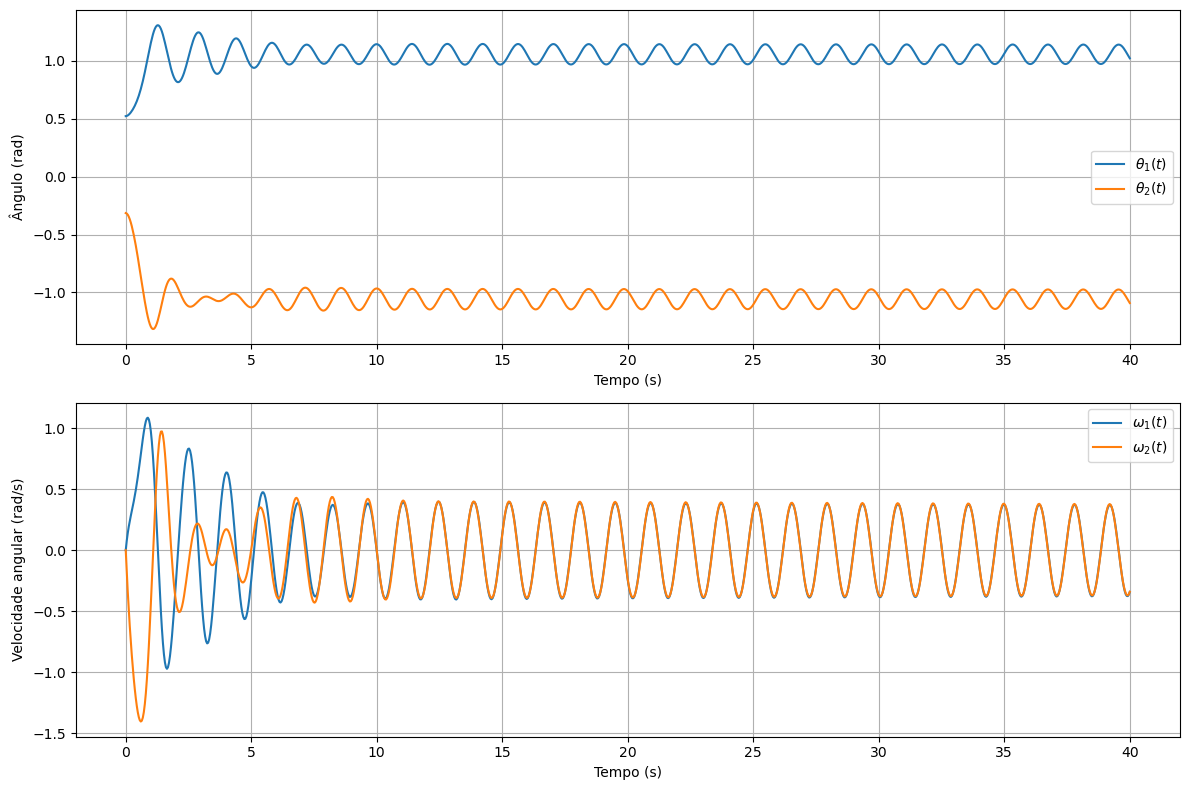

In [42]:
#codigo com atrito na mola


def pendulos(y, t, g, l, k, m, beta):
    theta1, omega1, theta2, omega2 = y  # Variáveis de estado
    
    # Termos comuns para simplificação
    sin_theta1, sin_theta2 = np.sin(theta1), np.sin(theta2)
    cos_theta1, cos_theta2 = np.cos(theta1), np.cos(theta2)
    sin_diff = sin_theta2 - sin_theta1
    vel_diff = omega1 * cos_theta1 - omega2 * cos_theta2
    
    # Derivadas de primeira ordem
    dtheta1 = omega1
    domega1 = - (g/l) * sin_theta1 - (k/m) * sin_diff * cos_theta1 - (beta/m) * vel_diff * cos_theta1
    dtheta2 = omega2
    domega2 = - (g/l) * sin_theta2 + (k/m) * sin_diff * cos_theta2 + (beta/m) * vel_diff * cos_theta2
    
    return [dtheta1, domega1, dtheta2, domega2]

# Parâmetros do sistema
g = 9.8  # Aceleração da gravidade (m/s²)
l = 1.0  # Comprimento do pêndulo (m)
k = 5  # Constante da mola (N/m)
m = 0.5  # Massa do pêndulo (kg)
beta = 1  # Coeficiente de atrito (N·s/m)

# Condições iniciais
theta1_0 = np.pi/6  # Ângulo inicial do pêndulo 1 (rad)
omega1_0 = 0.0       # Velocidade inicial do pêndulo 1 (rad/s)
theta2_0 = -np.pi/10 # Ângulo inicial do pêndulo 2 (rad)
omega2_0 = 0.0       # Velocidade inicial do pêndulo 2 (rad/s)

# Vetor de estado inicial
y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

# Tempo de simulação
t = np.linspace(0, 40, 1000)  # De 0 a 20 segundos

# Resolver as EDOs
sol = odeint(pendulos, y0, t, args=(g, l, k, m, beta))

# Extrair resultados
theta1 = sol[:, 0]
omega1 = sol[:, 1]
theta2 = sol[:, 2]
omega2 = sol[:, 3]

# Plotar os resultados
plt.figure(figsize=(12, 8))

# Ângulos vs tempo
plt.subplot(2, 1, 1)
plt.plot(t, theta1, label=r'$\theta_1(t)$')
plt.plot(t, theta2, label=r'$\theta_2(t)$')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (rad)')
plt.legend()
plt.grid()

# Velocidades angulares vs tempo
plt.subplot(2, 1, 2)
plt.plot(t, omega1, label=r'$\omega_1(t)$')
plt.plot(t, omega2, label=r'$\omega_2(t)$')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade angular (rad/s)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()